In [4]:
%matplotlib inline
import quandl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [10]:
#quandl key hidden here
quandl.ApiConfig.api_key = ""

In [34]:
#data scraping from Quandl. Quandl returns a Pandas dataframe, which is saved as df
df = quandl.get('WIKI/AAPL', start_date='2000-01-01', end_date='2016-12-31')
print(df.shape)

(4277, 12)


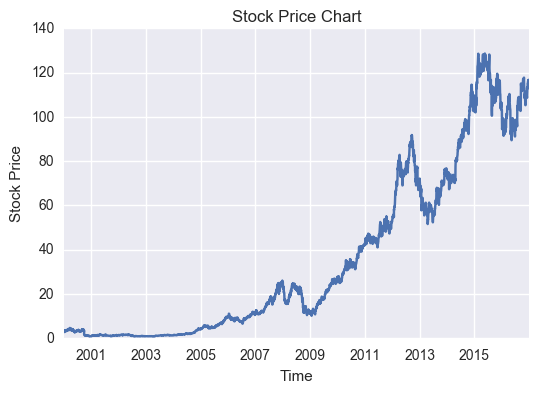

In [35]:
#plotting Adj. Close values 
plt.plot(df['Adj. Close'])
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Price Chart')

In [36]:
# Many stocks are split when their prices go high. When a stock is split in to N stocks,
# its value drops by the same factor N. This is very inconveient for analysis. 'Adj' values
# are adjusted to stock splitting, so that we don't have to worry about such discontinuities.
 
df.drop(['Open', 'High', 'Low', 'Close', 'Volume', 'Split Ratio', 'Ex-Dividend'], axis=1, inplace=True)

In [37]:
df.head()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,
2000-01-03,3.414416,3.662838,3.310880,3.644605,133949200.0
2000-01-04,3.524464,3.601628,3.294600,3.337252,128094400.0
2000-01-05,3.377950,3.599674,3.353531,3.386090,194580400.0
2000-01-06,3.455114,3.483766,3.093063,3.093063,191993200.0
2000-01-07,3.141901,3.288414,3.109342,3.239576,115183600.0


In [38]:
# checking for any missing data
df.isnull().sum()

Adj. Open      0
Adj. High      0
Adj. Low       0
Adj. Close     0
Adj. Volume    0
dtype: int64

Quandl provides clean data, so we do not really had to do it. 
But its a good practice to look at the data and have a feel for it.

In [39]:
# stock price change within a day = close price - open price
## change direction is +1 or -1 depending on whether price 
## increased or decreased on the day.

df['DayChange'] = df['Adj. Close']-df['Adj. Open']


In [100]:
corr =[]
dtList = list(range(1,31))
for dt in dtList:
    #print(dt, end='\t')
    df['shift'] = df['Adj. Close'].shift(dt)
    df['dtChange'] = df['Adj. Close']-df['shift']
    corr.append(np.corrcoef(df.dropna()['DayChange'], df.dropna()['dtChange'])[0][1])

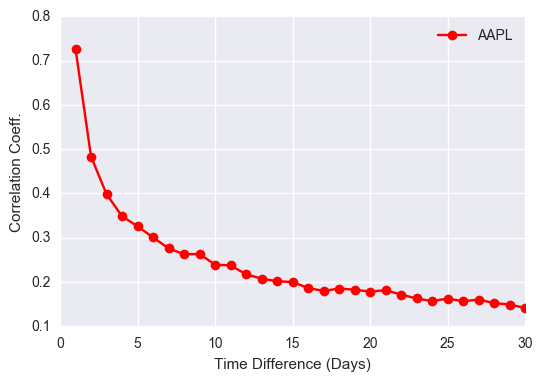

In [54]:
plt.plot(dtList, corr, 'ro-', label='AAPL')
plt.xlabel('Time Difference (Days)')
plt.ylabel('Correlation Coeff.')
plt.legend()

In [211]:
np.corrcoef(df.dropna()['Change'], df.dropna()['Change5'])

array([[ 1.        ,  0.57872609],
       [ 0.57872609,  1.        ]])

In [210]:
df.size

33858

In [113]:
CorrList=[]
#CorrList.append(corr)
TickList =['AAPL', 'BAC', 'GM', 'XOM']
for tick in TickList:
    df = quandl.get('WIKI/'+tick, start_date='2000-01-01', end_date='2016-12-31')
    df.drop(['Open', 'High', 'Low', 'Close', 'Volume', 'Split Ratio', 'Ex-Dividend'], axis=1, inplace=True)
    df['DayChange'] = df['Adj. Close']-df['Adj. Open']
    corr =[]
    dtList = list(range(1,5))
    for dt in dtList:
        df['shift'] = df['Adj. Close'].shift(dt)
        df['dtChange'] = df['Adj. Close']-df['shift']
        corr.append(np.corrcoef(df.dropna()['DayChange'], df.dropna()['dtChange'])[0][1])
    CorrList.append(corr)
    


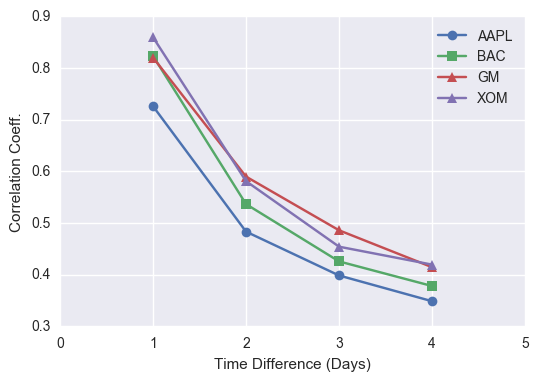

In [122]:
plt.plot(dtList, CorrList[0], 'o-', label=TickList[0] )
plt.plot(dtList,CorrList[1],'s-', label=TickList[1])
plt.plot(dtList, CorrList[2],'^-', label=TickList[2])
plt.plot(dtList, CorrList[3],'^-', label=TickList[3])

plt.legend()
plt.xlim(0,5)
plt.xlabel('Time Difference (Days)')
plt.ylabel('Correlation Coeff.')
